In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
pd.set_option('display.max_columns', 60) # show all 60 columns 


In [5]:
# read df
df = pd.read_csv('../data/energy.csv')

# top 5 rows 
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

## Handling missing values 
 some entries are listed as 'Not Available'; instead it may be converted to null 


In [7]:
# replace all occurences of 'Not Available' to null
df = df.replace('Not Available', np.nan)


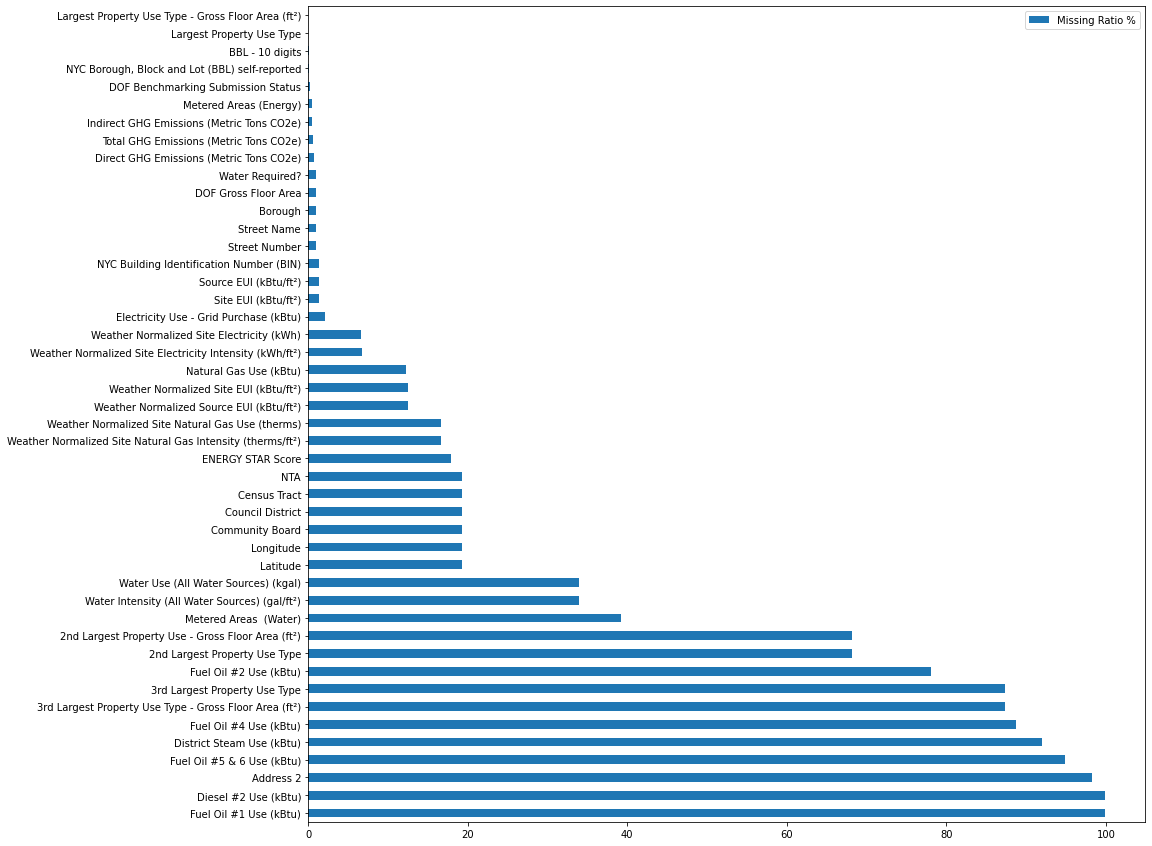

In [8]:
# visualize the ratio of nulls in each columns
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100     # the ratio of np.nan
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False) # drop columns with no null and sort
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", figsize = (15,15)) 
        
        plt.show()
        
    else:
        print('No NAs found')
plot_nas(df)

# https://stackoverflow.com/questions/69537383/how-to-plot-count-of-null-values-for-each-column-in-pandas-dataframe

here, I will drop those columns with missing values >= 60% since they are too sparse to be included in the analysis


In [9]:
na_df = (df.isnull().sum() / len(df)) * 100     # the ratio of np.nan
na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False) # drop columns with no null and sort
na_index = na_df[na_df > 60].index # get the index that nullratio > 60%

df.drop(na_index, axis = 1, inplace = True) # axis=1 drop by columns, inplace=True to modify the df

## Convert data types 
- so many columns are object type and need to convert to numerical type inorder to do analysis

In [10]:
# Iterate through the columns
for col in list(df.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        df[col] = df[col].astype(float)


- convert columns to categorical

In [11]:
pd.concat([df.dtypes, df.nunique()], axis = 1)

,0,1
Order,int64,11746
Property Id,int64,11746
Property Name,object,11740
Parent Property Id,object,102
Parent Property Name,object,103
BBL - 10 digits,object,11580
"NYC Borough, Block and Lot (BBL) self-reported",object,11581
NYC Building Identification Number (BIN),object,11507
Address 1 (self-reported),object,11645
Postal Code,object,286


In [12]:
df['Water Required?'] = df['Water Required?'].astype('category')
df['Borough'] = df['Borough'].astype('category')


convert Release Date(object) to date 

In [13]:
df['Release Data'] = pd.to_datetime(df['Release Date'],dayfirst = False, yearfirst = False, format = '%m/%d/%Y %I:%M:%S %p')
# https://docs.python.org/3/library/time.html#time.strftime
# %I for 12-hour clock + %p for AM, PM

convert to date type

## Exploratory Data Analysis (EDA)
- find anomalies, patterns and apply transformation if neccesary
- The target we want to predict is ENERGY STAR Score (0 ~ 100)

In [14]:
df = df.rename(columns = {'ENERGY STAR Score': 'score'}) # rename it to simplify
df.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,6.855070e+06,7.348107e+04,4.370302e+06,1.284677e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,2019.000000,161.000000,100.000000,100.000000,869265.000000,939329.000000,6259.400000,9393.000000,986366.000000,3.942852e+11,3.942852e+09,1.691763e+09,4.958273e+08,2.094340e+07,2.094340e+07,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000,40.912869,-73.715543,56.000000,51.000000,155101.000000


Text(0, 0.5, 'Number of Builings')

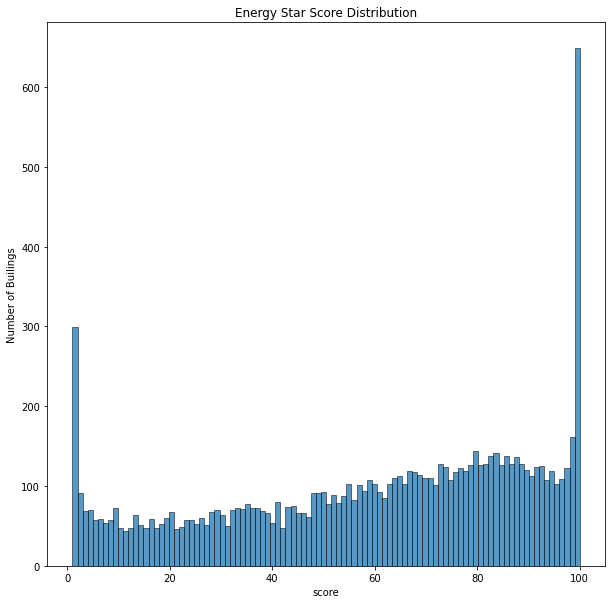

In [15]:
plt.figure(figsize=(10,10))
f = sns.histplot(data = df, x = df.score, bins= 100)
f.set_title('Energy Star Score Distribution')
f.set_ylabel('Number of Builings')


Energy Star Score is a pencentile rank and thus we should see a flat distribution. However, the data suggests that the data is heavily concentrated around 0 or 100. This may due to the fact that this score is self-reported.

## Removing outliers 

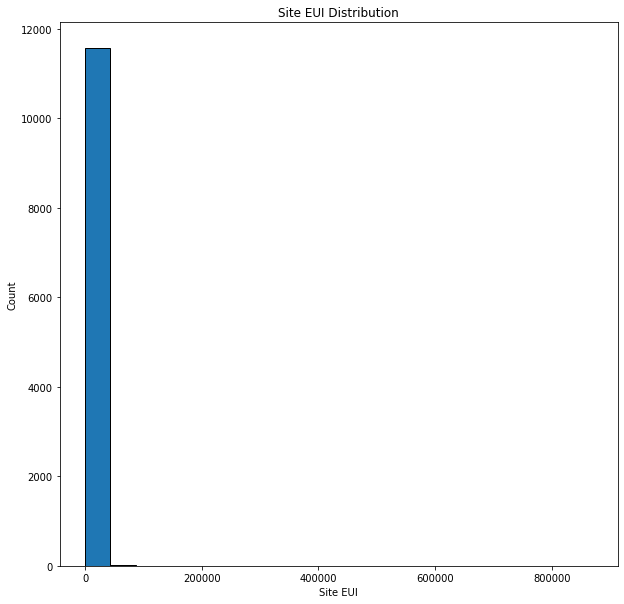

In [16]:
plt.figure(figsize=(10,10))
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');


The plot shows that Site EUI is heavily scewed due to having a outliers


In [17]:
df.describe()['Site EUI (kBtu/ft²)']

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

The significant higher mean= 280 over median = 78 and the maximum value = 869265 suggest that this columns is heavily affected by an outlier

In [18]:
df['Site EUI (kBtu/ft²)'].dropna().sort_values(ascending = False)

8068     869265.0
7        143974.4
3898     126307.4
8174     112173.6
8268     103562.7
           ...   
10041         0.0
127           0.0
11391         0.0
54            0.0
60            0.0
Name: Site EUI (kBtu/ft²), Length: 11583, dtype: float64

Looking closely to the value that is far from others

In [19]:
df.loc[df['Site EUI (kBtu/ft²)'].dropna().sort_values(ascending = False).index[0]]

Order                                                                                                      9984
Property Id                                                                                             4414323
Property Name                                                                                      234 Skillman
Parent Property Id                                                          Not Applicable: Standalone Property
Parent Property Name                                                        Not Applicable: Standalone Property
BBL - 10 digits                                                                                      3028937502
NYC Borough, Block and Lot (BBL) self-reported                                                       3028937502
NYC Building Identification Number (BIN)                                                      3390250 , 3338313
Address 1 (self-reported)                                                                   234 Skillman

We can consider data that lies outside of 3 iqr to be outliers and remove them

In [20]:

# Calculate first and third quartile
first_quartile = df['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = df['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
df = df[(df['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (df['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]



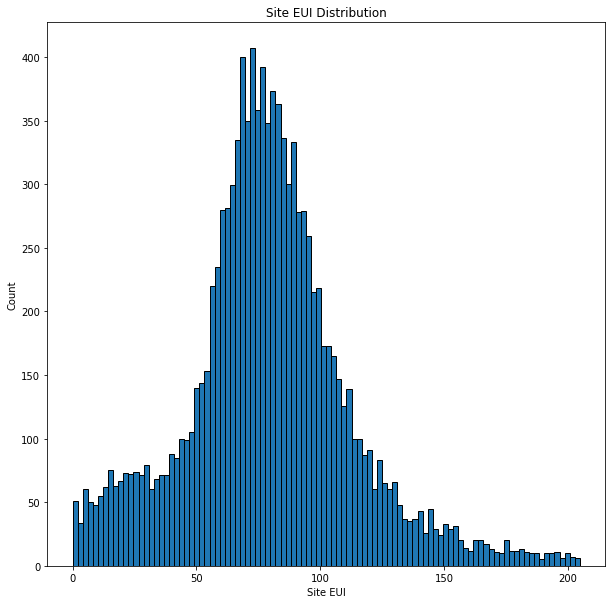

In [21]:
plt.figure(figsize=(10,10))
plt.hist(df['Site EUI (kBtu/ft²)'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); 
plt.title('Site EUI Distribution');

Now the distributions looks like normal distribution and thus better for further analysis such as regression

<AxesSubplot:>

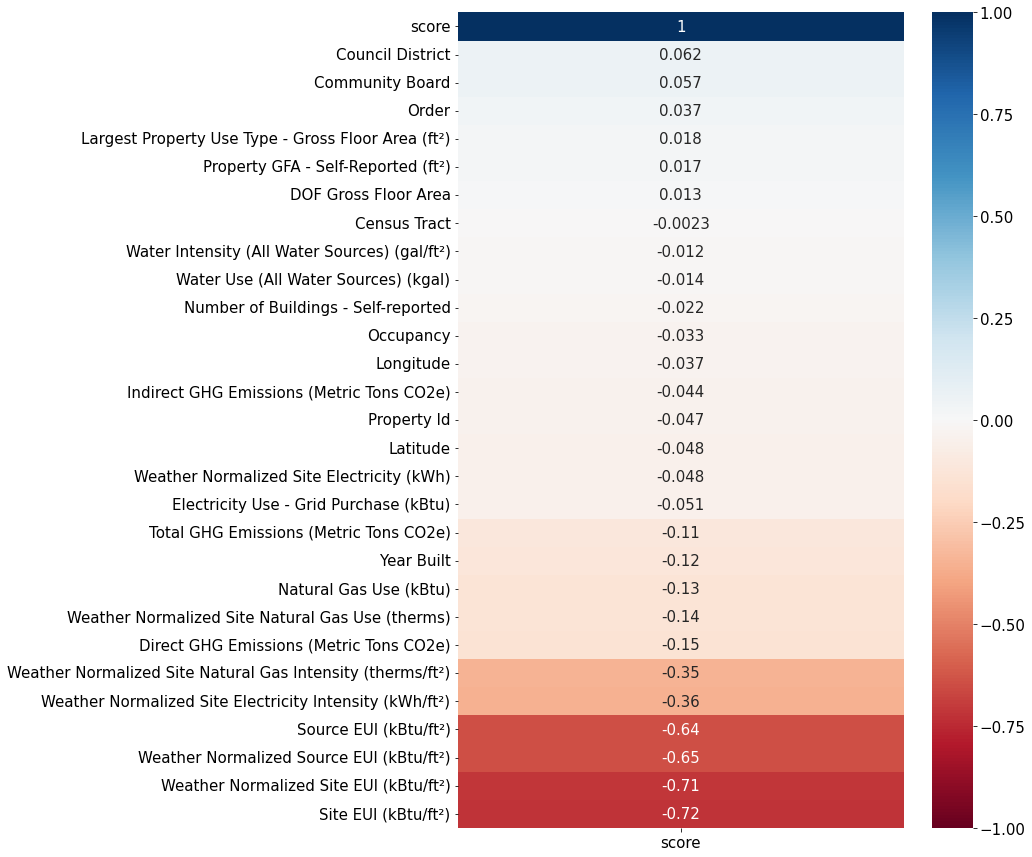

In [22]:
plt.rc('font', size=15) 
plt.figure(figsize = (10,15))
cor_matrix = df.corr()

sns.heatmap(cor_matrix[['score']].sort_values(by = 'score', ascending = False), # choose the correlation with score
            center = 0, 
            cmap = 'RdBu', # Red and Blue color scheme
            vmin=-1, vmax=1,
            annot = True)

Score have strong negative correlation with EUIs in general including Source EUI, Weather Normalized Source EUI... and having a strongest negative relationship with Site EUI. From the document, EUI refers as the energy use intensity which is Energy use per square footage of the builings and thus there is no surprise that the lower the EUI, the better the efficiency of energy use and hense the high score. Other than EUI, there are no other significant correlation with score.  

Since all EUI are strongly negatively correlated with score, it is better to inspect the relationship between different EUIs using scatter plots.

<Figure size 1080x1080 with 0 Axes>

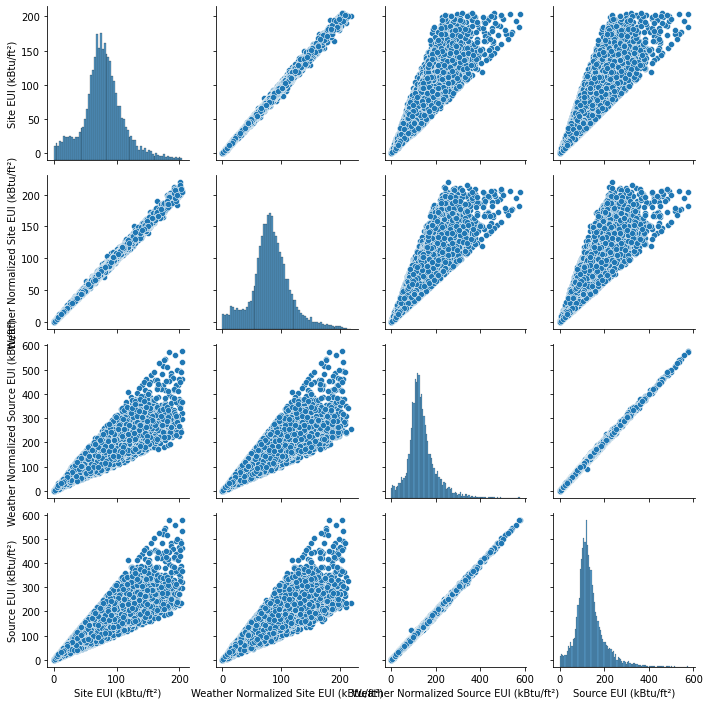

In [23]:
plt.rc('font', size=10) 
plt.figure(figsize = (15,15))
EUIs = df.loc[:, df.columns.str.contains('EUI')]# chose the columns with EUI in their name
g = sns.PairGrid(EUIs) 
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)


All of EUIs are strongly positively correlated and Nornalized Source/Site EUI and Source/Site EUI have correlation of 1. At later analysis, we may only use Site EUI to avoid collinearty affecting our model.

Similarly, we can plot the heatmap showing all the numerical value to find collearity

<AxesSubplot:>

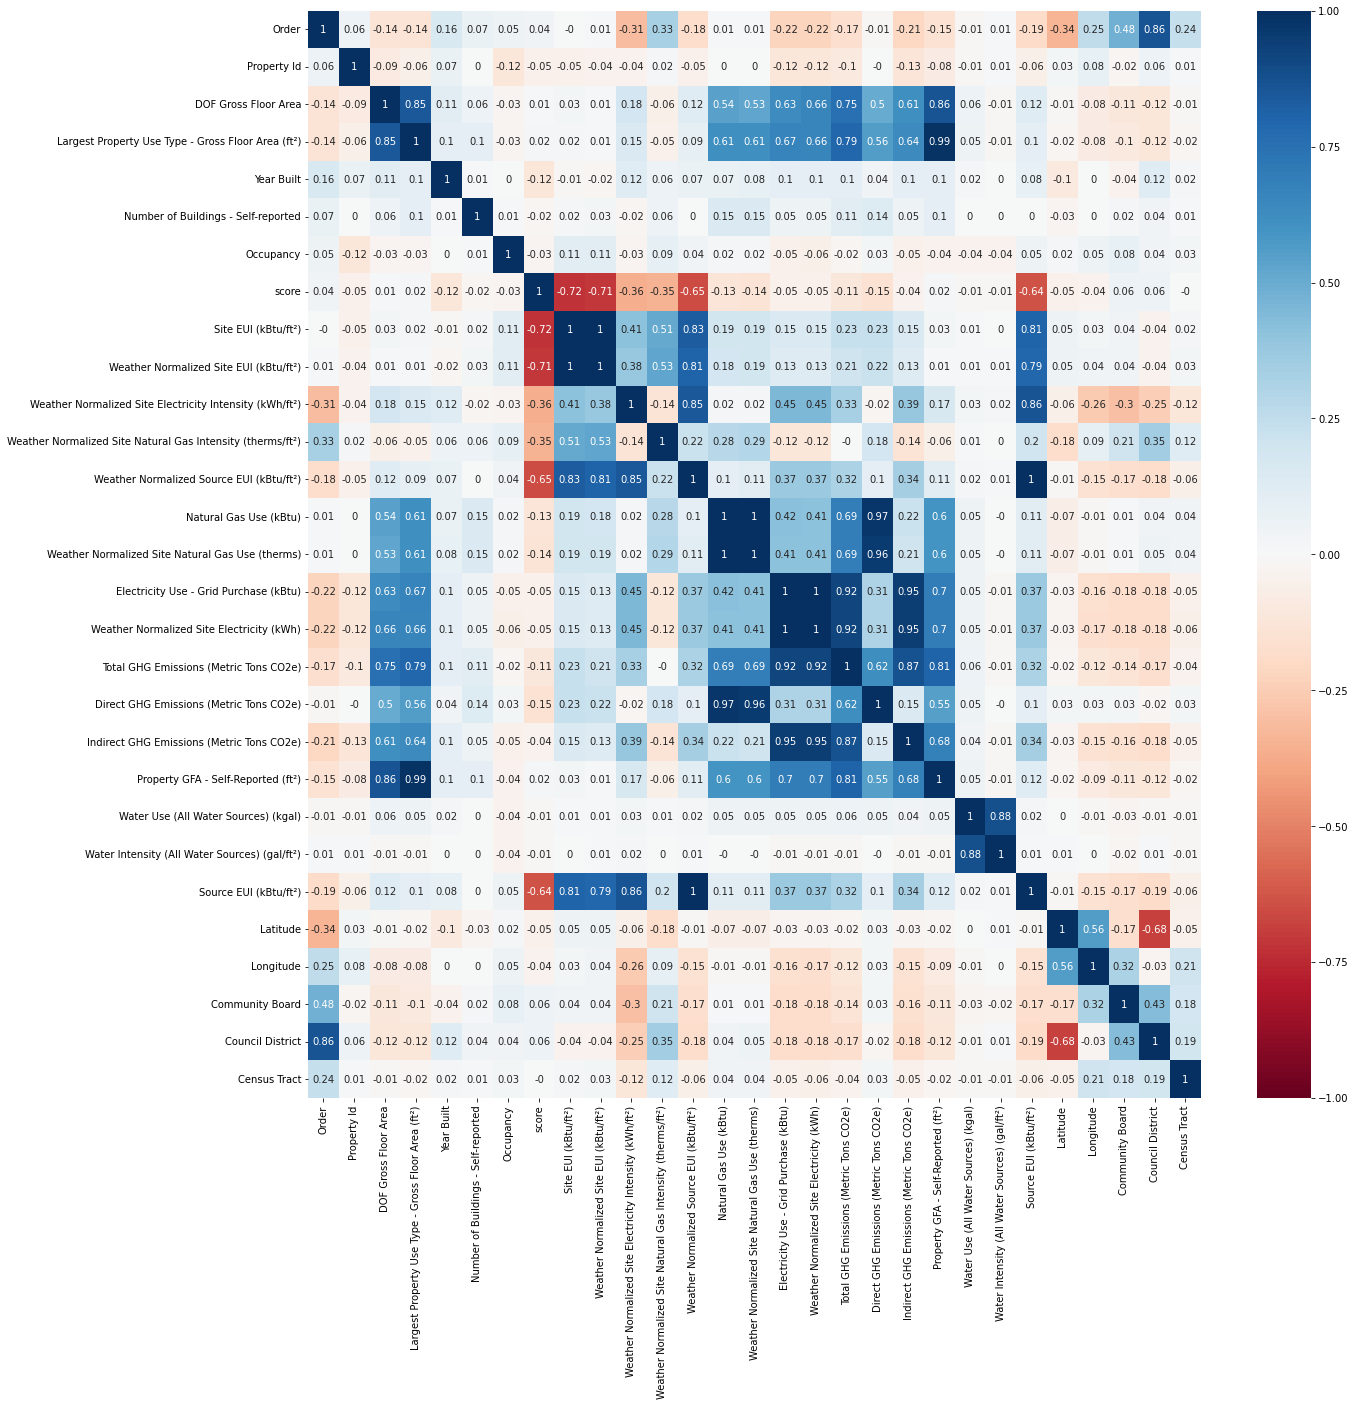

In [24]:
plt.rc('font', size=10) 
plt.figure(figsize = (20,20))
sns.heatmap(cor_matrix.round(2), 
            center = 0, 
            cmap = 'RdBu',
            vmin=-1, vmax=1,
            annot = True)

<AxesSubplot:xlabel='Site EUI (kBtu/ft²)', ylabel='score'>

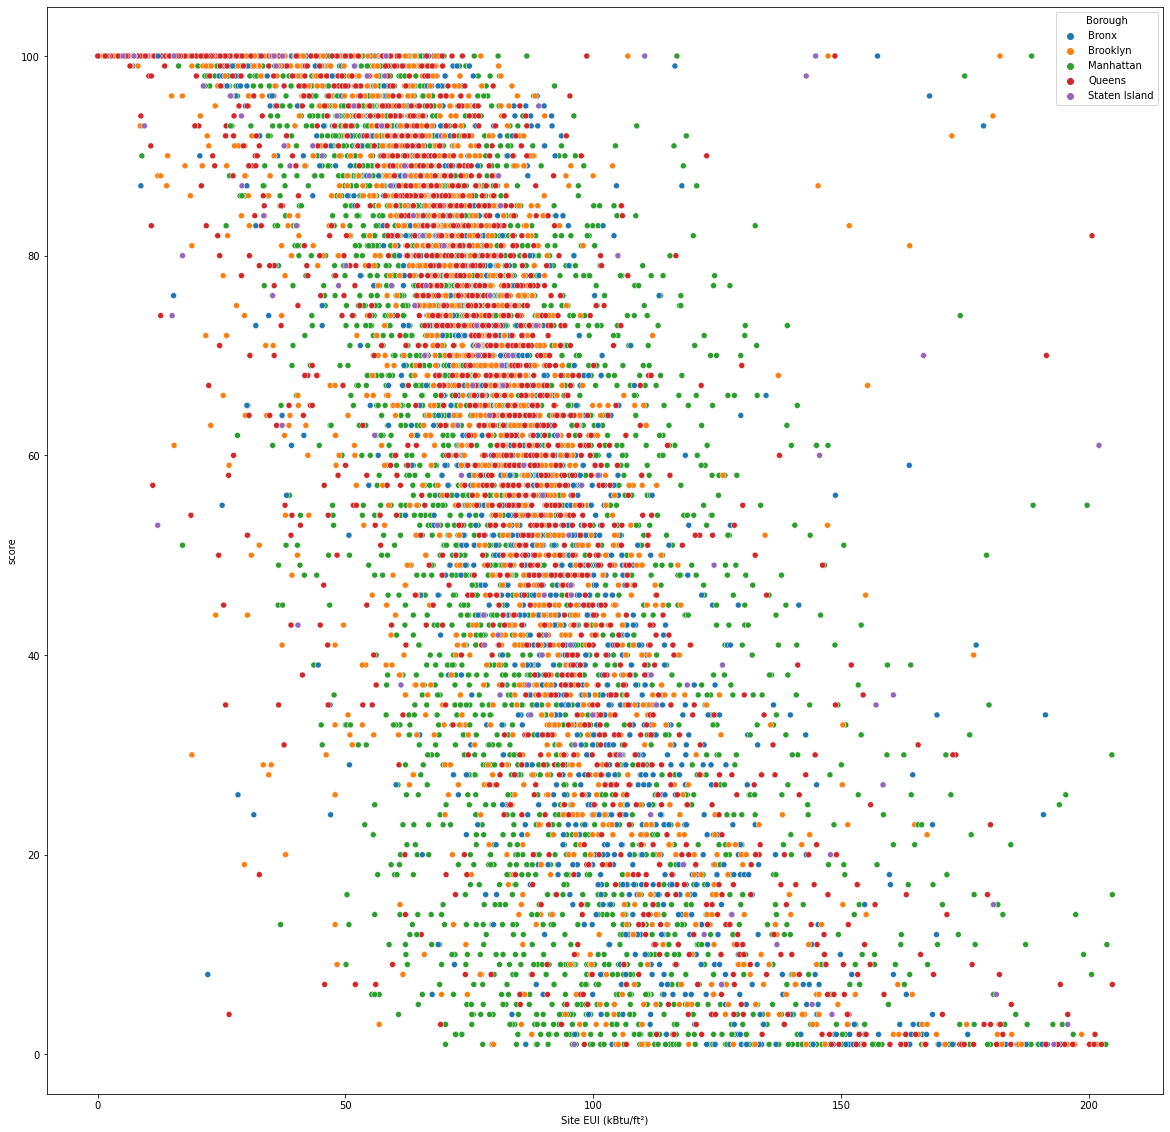

In [25]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = df.dropna(subset = 'score'), 
                x = 'Site EUI (kBtu/ft²)', 
                y  = 'score',
                hue = 'Borough')

In [26]:
df['Borough'].value_counts()

Manhattan        5005
Brooklyn         2207
Queens           2000
Bronx            1878
Staten Island     147
Name: Borough, dtype: int64

<AxesSubplot:xlabel='Borough', ylabel='score'>

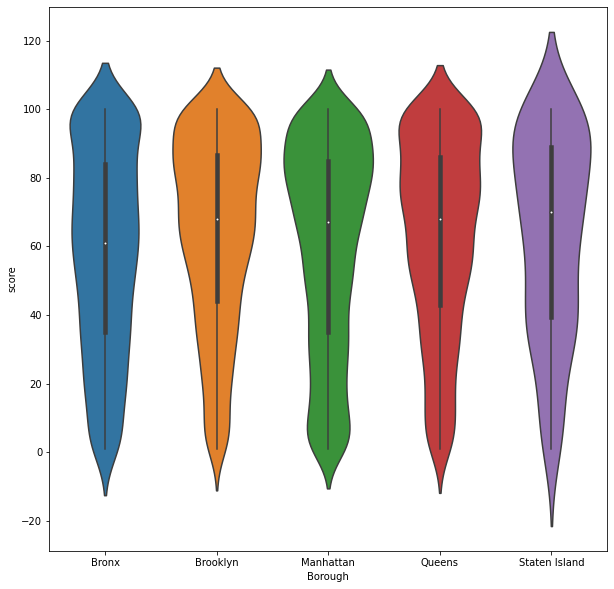

In [27]:
f, ax = plt.subplots(figsize = (10,10))
sns.violinplot(data = df, y= 'score', x = 'Borough')

The distribution of score in Staten Island may be diffent due to its small sample size compared to other Borough type

## Interactive scatterplot 

Acknowledge the large number of numerical variables, it may be better to develop an interactive scatterplot to find out the relationship between the variables since it is impossible to visualize the relationship one by one.

I used Dash module (JupyterDash) to created an interactive scatterplot that can choose which two numerical variable to be plotted in different file `scatter_dash.ipynb` in the same directory. Otherwise, this file will be too heavy to run.

In [53]:
# create a copy of df that only contains numeric data 
df_clean = df.select_dtypes(include = ['float64'])
df_clean = df_clean.dropna(subset = 'score')
df_clean.head()


,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
12,NaN,412503.0,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN
18,NaN,321464.0,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN
19,179130.0,204720.0,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,40.857943,-73.934962,12.0,10.0,281.0
20,102150.0,116744.0,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,40.858256,-73.934734,12.0,10.0,281.0
21,NaN,189766.0,100.0,68.0,NaN,6.1,0.5,NaN,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766.0,NaN,NaN,115.6,NaN,NaN,NaN,NaN,NaN


In [54]:
# export to be used in other files
df_clean.to_csv('energy_clean.csv', index = False)